# Possum Dataset Analysis

## Dataset Context

This dataset is a classic practice regression dataset originally from the DAAG R package. It's used in examples and exercises in the book "Data Analysis and Graphics Using R" by Maindonald, J.H. and Braun, W.J. (2003, 2007, 2010). The dataset is also used in the OpenIntro Statistics book chapter 8: Introduction to Linear Regression.

The challenge is to use regression techniques to predict the age of a possum, its head length, and whether it is male or female.

## Dataset Content

The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland.

## Acknowledgements

The data was originally found in the DAAG R package and used in the book "Data Analysis and Graphics Using R". A subset of the data was also put together for the OpenIntro Statistics book chapter 8: Introduction to Linear Regression.

## Original Source of Dataset

The original research was conducted by Lindenmayer, D. B., Viggers, K. L., Cunningham, R. B., and Donnelly, C. F. 1995. They focused on morphological variation among populations of the mountain brushtail possum, Trichosurus caninus Ogilby (Phalangeridae: Marsupiala). Their work was published in the Australian Journal of Zoology 43: 449-458.

## Research Questions

1. Can we use total length to predict a possum's head length?
2. Which possum body dimensions are most correlated with age and sex?
3. Can we classify a possum's sex by its body dimensions and location?
4. Can we predict a possum's trapping location from its body dimensions?

## Dataset Details

The dataset comes from the DAAG R package and contains nine morphometric measurements for each of 104 mountain brushtail possums, captured across seven locations from Southern Victoria to central Queensland.

## Educational Purpose

This dataset is commonly used for educational purposes, such as in the OpenIntro Statistics book, particularly in the chapter on linear regression.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./possum.xls")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

Pop
sex


In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [6]:
df.drop("case", axis=1, inplace=True)

In [7]:
df["Pop"] = encoder.fit_transform(df["Pop"])
df["sex"] = encoder.fit_transform(df["sex"])

In [8]:
df["Pop"].unique()

array([0, 1])

In [9]:
df["sex"].unique()

array([1, 0])

<Axes: >

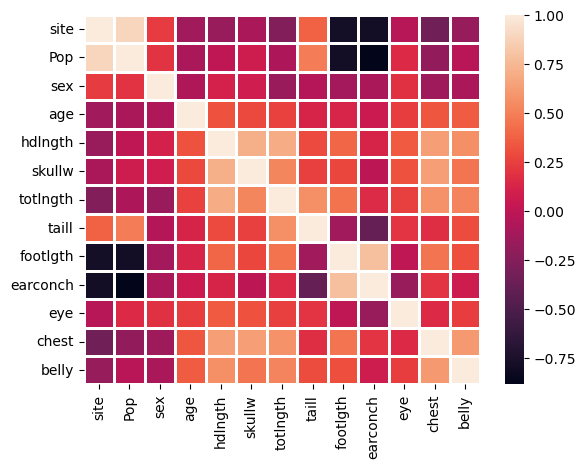

In [10]:
sns.heatmap(df.corr(), linewidths=1)

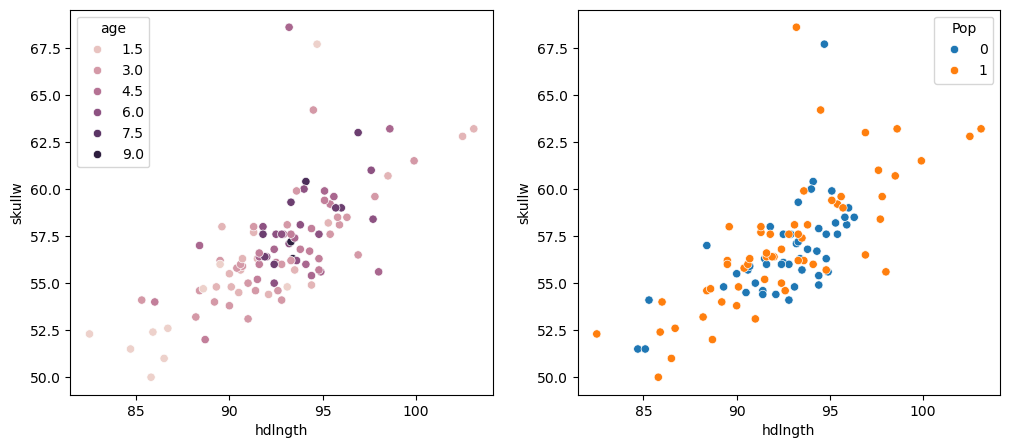

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax_1 = sns.scatterplot(x=df["hdlngth"], y=df["skullw"], hue=df["age"], ax=ax1)
ax_2 = sns.scatterplot(x=df["hdlngth"], y=df["skullw"], hue=df["Pop"], ax=ax2)